In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
df = pd.read_csv(r"R:\JN\modelling\diabetes_prediction_dataset.csv")

In [4]:
ohe_encoder=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
std_scaler=StandardScaler()

In [5]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [6]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Ensure the encoder is defined
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

Nominal_Col = ['gender', 'smoking_history']

# Fit and transform the data
Nominal_transformed_array = ohe_encoder.fit_transform(df[Nominal_Col])

# Convert to DataFrame with proper column names
Nominal_transformed_df = pd.DataFrame(
    Nominal_transformed_array, 
    columns=ohe_encoder.get_feature_names_out(Nominal_Col),
    index=df.index  # Ensure index matches original DataFrame
)

# Concatenate with the original DataFrame and drop the original categorical columns
df = pd.concat([df, Nominal_transformed_df], axis=1).drop(columns=Nominal_Col)


In [7]:
Std_cols=['age','bmi','HbA1c_level','blood_glucose_level']
df[Std_cols]=std_scaler.fit_transform(df[Std_cols])

In [8]:
X=df.drop(columns=['diabetes'])
y=df['diabetes']

In [9]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.33,random_state=42,
                                              stratify=y)

smote=SMOTE(random_state=42,sampling_strategy=0.3)
X_train_res,y_train_res=smote.fit_resample(X_train,y_train)

In [11]:
model=LogisticRegression()

In [12]:
model.fit(X_train_res,y_train_res)

LogisticRegression()

In [13]:
prediction=model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     30195
           1       0.65      0.76      0.70      2805

    accuracy                           0.94     33000
   macro avg       0.81      0.86      0.83     33000
weighted avg       0.95      0.94      0.95     33000

recall score0.7611408199643493


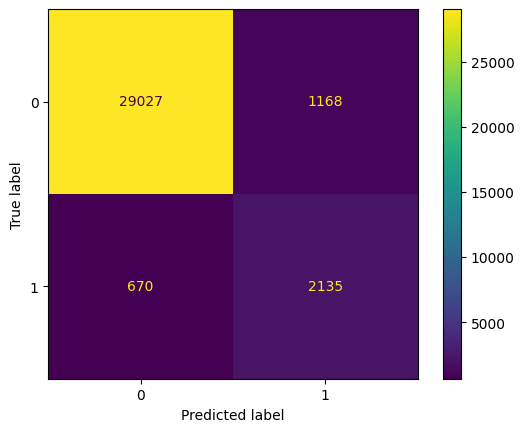

In [14]:
print(classification_report(y_test,prediction))
print(f"recall score{recall_score(y_test,prediction)}")

cm=confusion_matrix(y_test,prediction,labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=model.classes_)
disp.plot()

In [15]:
class_counts=df['diabetes'].value_counts()
print(class_counts)

majority_class=class_counts[0]
minority_class=class_counts[1]
ratio=majority_class/minority_class
print(f"Class Ratio(Majority:Minority):{ratio:.2f}:1")

diabetes
0    91500
1     8500
Name: count, dtype: int64
Class Ratio(Majority:Minority):10.76:1


In [16]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(class_weight='balanced'),
    "Weighted  Logistic ":LogisticRegression(class_weight='balanced', max_iter=1000),   
}

In [17]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [18]:
import pandas as pd
from sklearn.metrics import precision_score, f1_score, recall_score

# Ensure results are stored properly
results = []

# Iterate over models
for name, model in models.items():
    try:
        print(f"Training {name}...")  # Debugging print statement
        
        # Fit the model
        model.fit(X_train_res, y_train_res)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Compute metrics
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='macro')

        # Append results
        results.append({
            'Model': name,
            'Precision': round(precision, 3),
            'F1-Score': round(f1, 3),
            'Recall': round(recall, 3)
        })

    except Exception as e:
        print(f"Error training {name}: {e}")

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by='Recall', ascending=False)

# Display results clearly in Jupyter Notebook
from IPython.display import display
display(results_df)


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training SVM...
Training KNN...
Training Naive Bayes...
Training XGBoost...
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 18391, number of negative: 61305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 79696, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training Weighted  Logistic ...


,Model,Precision,F1-Score,Recall
7,XGBoost,0.947,0.921,0.906
8,LightGBM,0.957,0.955,0.888
9,Weighted Logistic,0.939,0.903,0.884
4,SVM,0.959,0.959,0.862
0,Logistic Regression,0.949,0.946,0.861
1,Decision Tree,0.951,0.950,0.859
2,Random Forest,0.964,0.964,0.854
3,Gradient Boosting,0.970,0.969,0.852
5,KNN,0.945,0.941,0.848
6,Naive Bayes,0.926,0.626,0.739


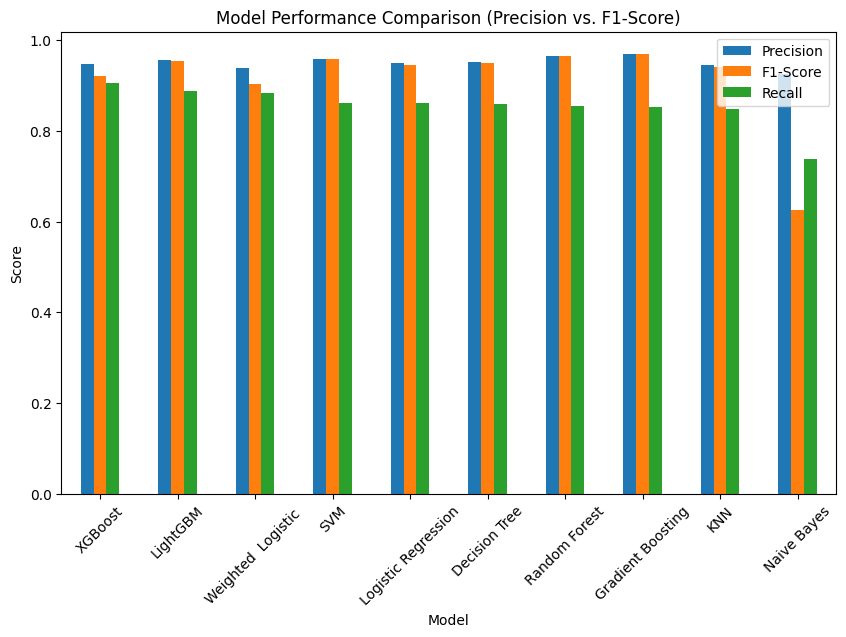

In [19]:
results_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison (Precision vs. F1-Score)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

In [20]:
def evaluate_model_performance(y_test, y_pred, model):
    """
    Evaluates the performance of a classification model by printing the classification report,
    precision score (as a percentage), and plotting the confusion matrix.

    Parameters:
        y_test (array-like): True labels.
        y_pred (array-like): Predicted labels.
        model: Trained model object with a 'classes_' attribute.
    """
    # Print classification report
    print(classification_report(y_test, y_pred))
    
    # Calculate and print precision score (rounded to nearest integer percentage)
    precision = recall_score(y_test, y_pred)
    print(f"recall_score: {round(precision * 100)}")
    
    # Compute confusion matrix using the labels from the model
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     30195
           1       0.48      0.90      0.63      2805

    accuracy                           0.91     33000
   macro avg       0.74      0.91      0.79     33000
weighted avg       0.95      0.91      0.92     33000

recall score0.9012477718360071


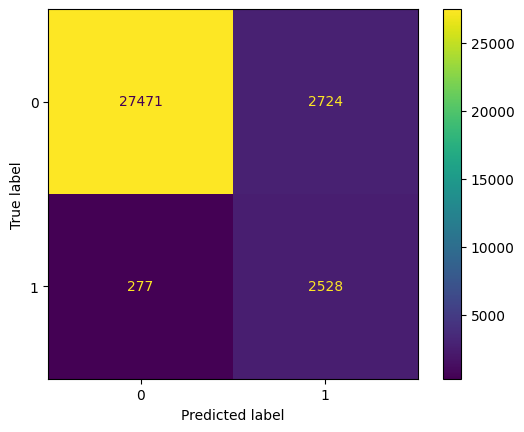

In [21]:
modelXGB_clf=XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss')
modelXGB_clf.fit(X_train_res,y_train_res)
model_prediction=modelXGB_clf.predict(X_test)



print(classification_report(y_test,model_prediction))
print(f"recall score{recall_score(y_test,model_prediction)}")

cm=confusion_matrix(y_test,model_prediction,labels=modelXGB_clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=modelXGB_clf.classes_)
disp.plot()




In [22]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],   
    'max_depth': [3, 5, 7],                
    'subsample': [0.8, 1.0],               
    'colsample_bytree': [0.8, 1.0],         
    'gamma': [0, 0.1, 0.2],                
    'scale_pos_weight': [10.76, 15],       
    'n_estimators': [100, 200]              
}

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [24]:
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',  # Use 'aucpr' for AUC-PR
    random_state=42,
    device='gpu'
)

In [25]:
grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='recall',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:03:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:03:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='gpu',
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'scale_pos_weight': [10.76, 15],
                         'subsample': [0.8, 1.0]},
             scoring='recall', verbose=1)

In [26]:
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 15, 'subsample': 0.8}
Best Recall Score: 1.0


In [27]:
best_model = grid_search.best_estimator_  # Retrieve best model
best_model.fit(X_train_res, y_train_res)  # Train on resampled data

C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:03:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:49: No visible GPU is found, setting device to CPU.
  bst.update(dtrain, iteration=i, fobj=obj)
C:\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:03:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\context.cc:203: XGBoost is not compiled with CUDA support.
  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
y_pred = best_model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")


Accuracy: 0.630
Precision: 0.187
Recall: 1.000
F1-Score: 0.315


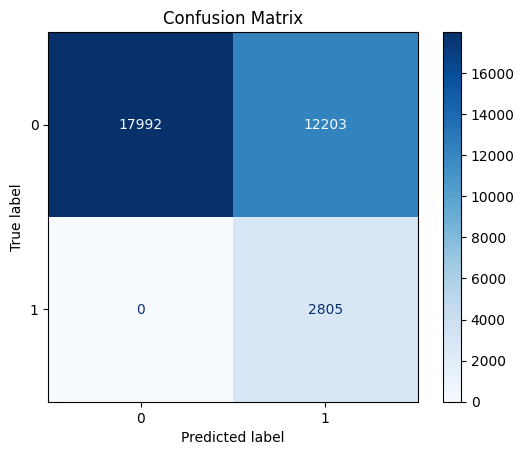

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()


C:\Users\ravir\AppData\Local\Temp\ipykernel_17548\2124147617.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx], palette="viridis")


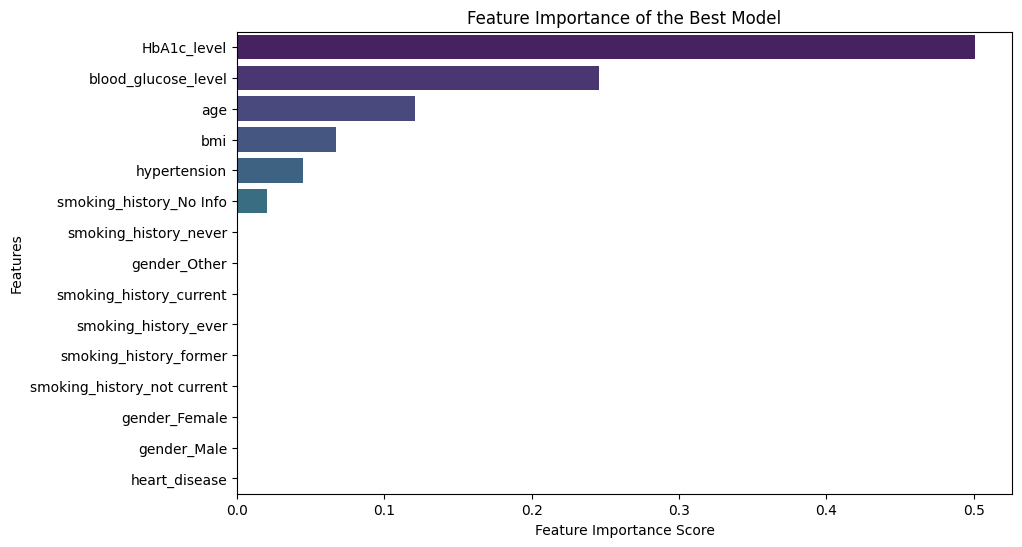

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importance from the best model
feature_importance = best_model.feature_importances_
features = X_train.columns

# Sort feature importance
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=features[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance of the Best Model")
plt.show()


In [32]:
import joblib

# Save the trained model
joblib.dump(best_model, "final_diabetes_model.pkl")

# Load it later
loaded_model = joblib.load("final_diabetes_model.pkl")


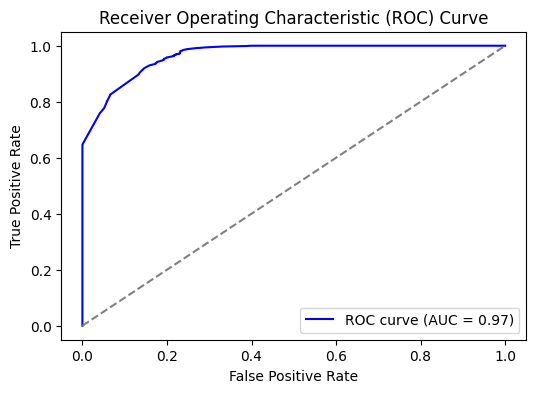

In [33]:
from sklearn.metrics import roc_curve, auc

# Get probability scores for ROC
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


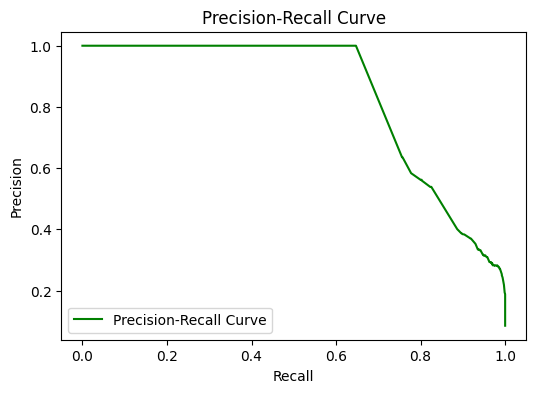

In [34]:
from sklearn.metrics import precision_recall_curve

# Get probabilities for the positive class
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color="green", label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


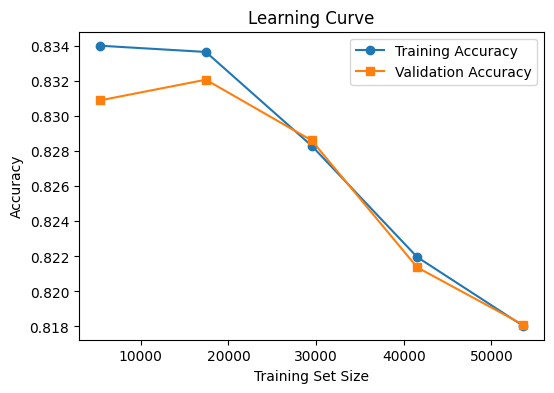

In [37]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, scoring="accuracy")

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [36]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
